In [1]:
#Distance between eye and finger whiling clicking on the key (fixation to touch point on the screen): error rate

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def readPickle(filename):
    import pickle

    # reload a file to a variable
    with open(filename, 'rb') as file:
        a_dict1 =pickle.load(file)

    return a_dict1

In [3]:
def writePickle(filename,dictionary):
    import pickle
    # pickle a variable to a file
    file = open(filename, 'wb')
    pickle.dump(dictionary, file)
    file.close()

In [4]:
dictFix = readPickle('./pkl/eyeMovementData.pkl')
#dictFin = readPickle('./pkl/fingerMovementData.pkl')

In [5]:
def KeyToXY(key):
    keys_ = ['q','w','e','r','t','y','u','i','o','p','å','a','s','d','f','g','h','j','k','l','ö','ä','z'
            ,'x','c','v','b','n','m','<',' ','enter']
    xs = [566, 697, 828, 959, 1090, 1221, 1352, 1483, 1614, 1745, 1876, 566, 697, 828, 959
         , 1090, 1221, 1352, 1483, 1614, 1745, 1876, 828, 959, 1090, 1221, 1352, 1483, 1614
         , 1810, 1193, 1737]
    ys = [1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 2185, 2185
         , 2185, 2185, 2185, 2185, 2185, 2185, 2185, 2185, 2185, 2415, 2415, 2415, 2415
         , 2415, 2415, 2415, 2415, 2645, 2645]

    if key not in keys_:
        return []
    else:
        p = keys_.index(key)
        return [xs[p], ys[p]]

In [6]:
def getFixation(dictFix,subject,block,sentence,keyPressingTime,index):
    currentInfo = dictFix[subject][block][sentence]
    if len(currentInfo['t'])!=0:
        len1 = len(currentInfo['t'][index])
        len2 = len(currentInfo['t'][index+1])
        #print('len1 = '+str(len1))
        if len1!=0 and len2!=0:
            #通过点击key之前最后一个fixation和点击键之后的第一个fixation的连线，和时间位置
            #计算fixation在某时间点上的坐标位置
            fixTimeBeforeKeyPressing = currentInfo['t'][index][len1-1]
            fixTimeAfterKeyPressing = currentInfo['t'][index+1][0]
            x1,y1 = currentInfo['x'][index][len1-1],currentInfo['y'][index][len1-1]
            x2,y2 = currentInfo['x'][index+1][0],currentInfo['y'][index+1][0]

            if fixTimeBeforeKeyPressing<=keyPressingTime<=fixTimeAfterKeyPressing:
                #如果当前点击key的时间介于(点击当前key之前最后一个fixation数据行的采样时间)
                #与(点击当前key之后第一个fixation数据行的采样时间)之间
                #则通过这两个时间点fixation的位置和时间计算（假设眼球匀速运动）到key pressing的时间点时，fixation的坐标
                a = (keyPressingTime-fixTimeBeforeKeyPressing)/(fixTimeAfterKeyPressing-fixTimeBeforeKeyPressing)
                b = (fixTimeAfterKeyPressing-keyPressingTime)/(fixTimeAfterKeyPressing-fixTimeBeforeKeyPressing)
                x = b*x1+a*x2
                y = b*y1+a*y2
                return [x,y]
            else:
                print('----------------------------------------')
                print('before')
                print(currentInfo['t'][index])
                print('after')
                print(currentInfo['t'][index+1])
                print('keyPressingTime')
                print(keyPressingTime)
                print('----------------------------------------')
                return 0
        else:
            return 0
    else:
        return 0

In [7]:
#no use
#画散点图 Scatter
def drawGraph(xlist, ylist, title, xlable,ylable):
    import matplotlib.pyplot as plt
  
    t = title
    
    #去掉 IKI 结果中的 outlier
    #temp = rejectOutliers(xlist, ylist)
    #xlist1 = temp[0]
    #ylist1 = temp[1]
    
    
    yfit = []
    a,b = np.polyfit(xlist, ylist, 1)
    print([a,b])
   
    for item in xlist:
        yfit.append(a*item+b)

    plt.xlabel(xlable)  
    plt.ylabel(ylable)
    plt.title(t)
    
    
    plt.plot(xlist, ylist ,'ro', alpha=.5)
    #plt.plot(xlist1, ylist1 ,'ro', alpha=.5)
    
    plt.plot(xlist,yfit, linewidth = 2)


    plt.savefig(t+".png")
   
    plt.show()

In [8]:
#no use
#画散点图 Scatter
#test 去掉y = 0

def drawGraph(xlist, ylist, title, xlable,ylable):
    import matplotlib.pyplot as plt
  
    t = title
    
    #存放y=0的数据点
    y0list = []
    x0list = []
    #存放y!=0的数据点
    y1list = []
    x1list = []
    for index in range(len(ylist)):
        if ylist[index]==0:
            y0list.append(ylist[index])
            x0list.append(xlist[index])
        else:
            y1list.append(ylist[index])
            x1list.append(xlist[index])
    
    #去掉 IKI 结果中的 outlier
    #temp = rejectOutliers(xlist, ylist)
    #xlist1 = temp[0]
    #ylist1 = temp[1]
    
    
    yfit = []
    a,b = np.polyfit(x1list, y1list, 1)
    print([a,b])
   
    for item in x1list:
        yfit.append(a*item+b)

    plt.xlabel(xlable)  
    plt.ylabel(ylable)
    plt.title(t)
    
    
    plt.plot(x1list, y1list ,'ro', alpha=.5)
    #plt.plot(xlist1, ylist1 ,'ro', alpha=.5)
    
    plt.plot(x1list,yfit, linewidth = 2)


    plt.savefig(t+".png")
   
    plt.show()

In [9]:
#画散点图 Scatter,将1-hand,2-hand画在同一个散点图上

def drawGraph2(xylist, title, xlable,ylable,ytype):
    import matplotlib.pyplot as plt
  
    t = title
    
    if ytype=='error':
        xlist1 = xylist[0][0]
        ylist1 = xylist[0][1]
        xlist2 = xylist[1][0]
        ylist2 = xylist[1][1]
    elif ytype=='key-hand':
        xlist1 = xylist[0][0]
        ylist1 = xylist[0][2]
        xlist2 = xylist[1][0]
        ylist2 = xylist[1][2]
    
    
    yfit1 = []
    #a1,b1 = np.polyfit(xlist1, ylist1, 1)
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(xlist1, ylist1)
    for item1 in xlist1:
        yfit1.append(slope1*item1+intercept1)
        
    yfit2 = []
    #a2,b2 = np.polyfit(xlist2, ylist2, 1)
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(xlist2, ylist2)
    for item2 in xlist2:
        yfit2.append(slope2*item2+intercept2)

    plt.xlabel(xlable)  
    plt.ylabel(ylable)
    plt.title(t)
    
    
    #plt.plot(xlist, ylist ,'ro', alpha=.5)
    plt.plot(xlist1, ylist1 ,'yo', alpha=.5,label='2-Hand (Corr:'+str(round(r_value1,2))+')')
    plt.plot(xlist1,yfit1,'y', linewidth = 2)

    plt.plot(xlist2, ylist2 ,'bo', alpha=.5,label='1-Hand (Corr:'+str(round(r_value2,2))+')')
    plt.plot(xlist2,yfit2,'b', linewidth = 2)
    
    plt.legend()


    plt.savefig(t+".png")
   
    plt.show()

In [10]:
#计算点击key的时刻的手眼距离与 Error rate 和 IKI 之间的关系，per sentence
def calculatedistance(block):
    avgErrPerSentence = []
    avgFinger2EyeDis = []
    avgFinger2KeyDis = []

    for subject in dictFix.keys():
        for sentence in dictFix[subject][block].keys():
            #记录一个句子中每次点击key的时候fixation与手指与点击位置之间的距离
            disFinger2EyeInSentence = []
            disFinger2KeyInSentence = []
            averageIKI = np.mean(dictFix[subject][block][sentence]['IKI'])
            print(str(sentence)+' averageIKI = '+str(averageIKI))
            #当前sentence的 error rate = 当前sentence的总backspace数/当前sentence总点击key的数量
            countAllKeyPress = 0
            countBackspace = 0

            for index in range(len(dictFix[subject][block][sentence]['key'])-1):
                #'-1'即不考虑每句最后一次键盘点击

                if dictFix[subject][block][sentence]['key'][index]=='<':
                    countBackspace = countBackspace + 1
                else:
                    countAllKeyPress = countAllKeyPress + 1

                if dictFix[subject][block][sentence]['key'][index] not in [' ','<','enter']:
                    touchx = dictFix[subject][block][sentence]['touchx'][index]
                    touchy = dictFix[subject][block][sentence]['touchy'][index]
                    keyPressingTime = dictFix[subject][block][sentence]['trialtime'][index]
                    fixInfo = getFixation(dictFix,subject,block,sentence,keyPressingTime,index)
                    if fixInfo!=0:
                        #计算finger touch点到fixation之间的距离
                        fixationx = fixInfo[0]
                        fixationy = fixInfo[1]
                        disFinger2EyeInSentence.append(np.sqrt((fixationx-touchx)*(fixationx-touchx)+(fixationy-touchy)*(fixationy-touchy)))                
                    else:
                        pass

                    #计算点击key时的手指touch点与key中心的距离
                    keyx,keyy = KeyToXY(dictFix[subject][block][sentence]['key'][index])
                    disFinger2KeyInSentence.append(np.sqrt((keyx-touchx)*(keyx-touchx)+(keyy-touchy)*(keyy-touchy)))

            #if countBackspace!=0:
            if True:
                #跳过错误率为0的句子
                avgErrPerSentence.append(countBackspace/(countBackspace+countAllKeyPress))
                avgFinger2EyeDis.append(np.mean(disFinger2EyeInSentence))
                avgFinger2KeyDis.append(np.mean(disFinger2KeyInSentence))
        
    return [avgFinger2EyeDis,avgErrPerSentence,avgFinger2KeyDis]

58 averageIKI = 330.347826087
46 averageIKI = 306.928571429
39 averageIKI = 248.736842105
53 averageIKI = 261.454545455
57 averageIKI = 286.852941176
65 averageIKI = 201.222222222
20 averageIKI = 316.222222222
42 averageIKI = 238.157894737
50 averageIKI = 308.290322581
75 averageIKI = 255.833333333
28 averageIKI = 225.612903226
25 averageIKI = 239.325
40 averageIKI = 289.75
67 averageIKI = 297.171428571
29 averageIKI = 242.272727273
27 averageIKI = 196.611111111
32 averageIKI = 266.0
21 averageIKI = 238.033333333
45 averageIKI = 218.344827586
22 averageIKI = 294.655172414
29 averageIKI = 367.952380952
64 averageIKI = 347.952380952
35 averageIKI = 274.25
66 averageIKI = 253.0
50 averageIKI = 248.476190476
14 averageIKI = 245.260869565
5 averageIKI = 250.15
45 averageIKI = 280.285714286
44 averageIKI = 257.739130435
41 averageIKI = 234.277777778
63 averageIKI = 225.5
58 averageIKI = 277.333333333
61 averageIKI = 237.434782609
23 averageIKI = 267.347826087
75 averageIKI = 283.833333333
28

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



48 averageIKI = 275.208333333
70 averageIKI = 315.555555556
38 averageIKI = 391.342105263
59 averageIKI = 270.80952381
34 averageIKI = 273.633333333
50 averageIKI = 781.80952381
61 averageIKI = 283.47826087
52 averageIKI = 394.137931034
43 averageIKI = 257.035714286
44 averageIKI = 295.434782609
2 averageIKI = 308.5
52 averageIKI = 166.590909091
49 averageIKI = 200.869565217
18 averageIKI = 179.8
10 averageIKI = 158.25
66 averageIKI = 202.142857143
21 averageIKI = 177.571428571
15 averageIKI = 202.5
2 averageIKI = 188.810810811
14 averageIKI = 144.714285714
58 averageIKI = 220.970588235
31 averageIKI = 206.236842105
48 averageIKI = 157.636363636
42 averageIKI = 203.888888889
28 averageIKI = 162.346153846
61 averageIKI = 144.130434783
59 averageIKI = 157.4
5 averageIKI = 121.666666667
36 averageIKI = 979.818181818
51 averageIKI = 204.142857143
32 averageIKI = 183.486486486
33 averageIKI = 237.517241379
58 averageIKI = 226.774193548
36 averageIKI = 229.162162162
15 averageIKI = 267.4444

28 averageIKI = 410.363636364
21 averageIKI = 376.0
43 averageIKI = 405.230769231
54 averageIKI = 426.166666667
17 averageIKI = 360.421052632
72 averageIKI = 498.444444444
24 averageIKI = 390.428571429
47 averageIKI = 476.185185185
7 averageIKI = 390.25
56 averageIKI = 361.45
33 averageIKI = 323.130434783
46 averageIKI = 446.038461538
53 averageIKI = 442.526315789
59 averageIKI = 396.965517241
49 averageIKI = 413.526315789
18 averageIKI = 408.714285714
64 averageIKI = 352.0
28 averageIKI = 463.166666667
74 averageIKI = 357.714285714
34 averageIKI = 470.391304348
35 averageIKI = 373.1
43 averageIKI = 324.916666667
29 averageIKI = 447.428571429
52 averageIKI = 373.875
73 averageIKI = 359.391304348
62 averageIKI = 375.454545455
16 averageIKI = 377.583333333
26 averageIKI = 393.9
31 averageIKI = 331.21875
68 averageIKI = 331.421052632
40 averageIKI = 314.3125
11 averageIKI = 305.863636364
47 averageIKI = 343.848484848
33 averageIKI = 310.47826087
72 averageIKI = 340.974358974
2 averageIKI 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


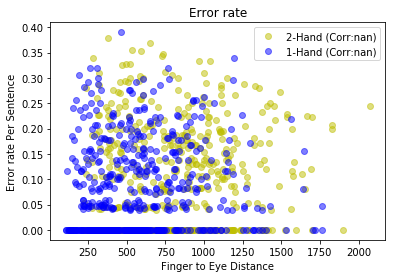

In [11]:
drawGraph2([calculatedistance('1'),calculatedistance('2')], 'Error rate','Finger to Eye Distance','Error rate Per Sentence','error')

58 averageIKI = 330.347826087
46 averageIKI = 306.928571429
39 averageIKI = 248.736842105
53 averageIKI = 261.454545455
57 averageIKI = 286.852941176
65 averageIKI = 201.222222222
20 averageIKI = 316.222222222
42 averageIKI = 238.157894737
50 averageIKI = 308.290322581
75 averageIKI = 255.833333333
28 averageIKI = 225.612903226
25 averageIKI = 239.325
40 averageIKI = 289.75
67 averageIKI = 297.171428571
29 averageIKI = 242.272727273
27 averageIKI = 196.611111111
32 averageIKI = 266.0
21 averageIKI = 238.033333333
45 averageIKI = 218.344827586
22 averageIKI = 294.655172414
29 averageIKI = 367.952380952
64 averageIKI = 347.952380952
35 averageIKI = 274.25
66 averageIKI = 253.0
50 averageIKI = 248.476190476
14 averageIKI = 245.260869565
5 averageIKI = 250.15
45 averageIKI = 280.285714286
44 averageIKI = 257.739130435
41 averageIKI = 234.277777778
63 averageIKI = 225.5
58 averageIKI = 277.333333333
61 averageIKI = 237.434782609
23 averageIKI = 267.347826087
75 averageIKI = 283.833333333
28

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


32 averageIKI = 183.486486486
33 averageIKI = 237.517241379
58 averageIKI = 226.774193548
36 averageIKI = 229.162162162
15 averageIKI = 267.444444444
64 averageIKI = 211.952380952
7 averageIKI = 210.419354839
30 averageIKI = 214.826086957
70 averageIKI = 210.111111111
38 averageIKI = 225.548387097
74 averageIKI = 222.028571429
52 averageIKI = 199.272727273
21 averageIKI = 208.8125
5 averageIKI = 182.19047619
68 averageIKI = 137.578947368
25 averageIKI = 152.045454545
73 averageIKI = 191.869565217
17 averageIKI = 207.4
75 averageIKI = 214.0
47 averageIKI = 220.684210526
49 averageIKI = 224.673469388
34 averageIKI = 267.458333333
64 averageIKI = 228.095238095
44 averageIKI = 198.347826087
41 averageIKI = 169.111111111
66 averageIKI = 234.65625
43 averageIKI = 189.791666667
21 averageIKI = 239.925925926
24 averageIKI = 230.945945946
2 averageIKI = 192.954545455
52 averageIKI = 178.227272727
68 averageIKI = 163.0
63 averageIKI = 178.555555556
58 averageIKI = 214.925925926
20 averageIKI = 2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


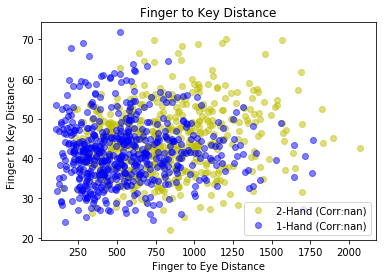

In [12]:
drawGraph2([calculatedistance('1'),calculatedistance('2')], 'Finger to Key Distance','Finger to Eye Distance','Finger to Key Distance','key-hand')